In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Create a $t$ distribution

In [2]:
DF = 3
LOC = 0
SCALE = 2

x = np.linspace(-20, 20, 500)

t_pdf = t.pdf(x, df = DF, loc = LOC, scale = SCALE)

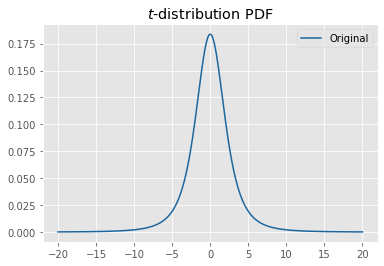

In [3]:
plt.plot(x, t_pdf, color = '#1c669e', label = 'Original')
plt.title('$t$-distribution PDF')
plt.legend()
plt.show()

In [4]:
# Sample from the distr
t_samples = [t.rvs(df = DF, loc= LOC, scale = SCALE, size = 1000) for i in range(1000)]

## Recreate the distribution from the samples

In [5]:
# Recreate the distribution
recreated_params = []

for sample in tqdm(t_samples):
    df, loc, scale = t.fit(sample)
    recreated_params.append((df, loc, scale))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.70it/s]


1000it [00:01, 549.08it/s]
C:\Users\aleksander.molak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


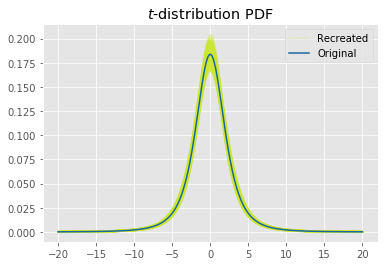

In [6]:
# Plot recreated vs original

for i, params in tqdm(enumerate(recreated_params)):
    
    # Get neww PDF
    t_pdf_r = t.pdf(x, *params)
    
    if i == 0:
        plt.plot(x, t_pdf_r, color = '#cceb34', alpha = .2, label = 'Recreated')
    else:
        plt.plot(x, t_pdf_r, color = '#cceb34', alpha = .2)
            
plt.plot(x, t_pdf, color = '#1c669e', label = 'Original')
plt.title('$t$-distribution PDF')
plt.legend()
plt.show()